<a href="https://colab.research.google.com/github/zjdesj/segmentation-3D/blob/master/segment_cattle_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2


def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

Example cattle image

In [ ]:
image = cv2.imread('/content/DJI_20230109105426_0030_Zenmuse-L1-mission.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=None, fx=0.5, fy=0.5)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [12]:
masks = mask_generator.generate(image)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [ ]:
print(len(masks))
#print(masks[0].keys())
print(image.shape)

# 测试crop 图片

In [10]:
mask = masks[9]["segmentation"]
mask = mask[:, :, np.newaxis]
img = image * mask
print(img.shape)
bbox = masks[9]['bbox']
x, y, w, h = bbox
print(bbox, x,y,w,h)
img2 = img[y: (y + h), x:(x + w), :]
img3 = image[y: (y + h), x:(x + w), :]
print(img2.shape)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.axis('off')
plt.show() 

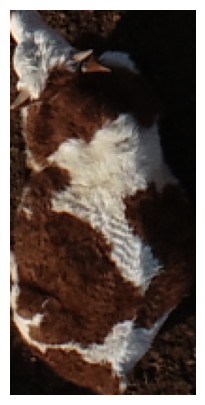

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(img3)
plt.axis('off')
plt.show() 

In [ ]:
mask = masks[0]["segmentation"]
m, n = mask.shape
print(mask)
col = mask[:, -1]
print(col, col.shape)
le = col[col == True]
print(f'le {len(le)}')

nRemain = []
for j in range(n):
  col = mask[:, j]
  le = col[col == False]
  if len(le) < m:
    nRemain.append(j)
    #np.insert(mRemain, -1, )
mask = mask[:, nRemain]


m, n = mask.shape

mRemain = []
for i in range(m):
  row = mask[i, :]
  le = row[row == False]

  if len(le) < n:
    mRemain.append(i)
    #np.insert(mRemain, -1, )
mask = mask[mRemain,:]


print(f'nRemian {len(nRemain)}  {nRemain} ')
print(f'mRemian {len(mRemain)}  {mRemain} ')

print(mask.shape)
#plt.figure(figsize=(20,20))
#plt.imshow(nRemain)
#plt.axis('off')
#plt.show()

# 使用程序截取

In [ ]:
# 保存mask
!python segment-anything.py --input /content/input --output /content/images6


In [ ]:
import os
os.chdir('/content/images6/')
!zip images.zip -r /content/images6/*

In [ ]:
from google.colab import files
files.download('/content/images6/images.zip')

In [15]:
!rm -rf /content/image15

In [ ]:
# 测试cv2保存png
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
image = cv2.imread('/content/DJI_20230109105426_0030_Zenmuse-L1-mission.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=None, fx=0.5, fy=0.5)

# 显示图片
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

print(image.shape)


In [ ]:
mask = cv2.imread('/content/mask.png')
mask = np.sum(mask, axis=2)
m, n = mask.shape
print(mask)
#col = mask[:, -1]
#print(col, col.shape)
#le = col[col == True]
#print(f'le {len(le)}')

nRemain = []
for j in range(n):
  col = mask[:, j]
  le = col[col == 0]
  if len(le) < m:
    nRemain.append(j)
    #np.insert(mRemain, -1, )
mask = mask[:, nRemain]


m, n = mask.shape

mRemain = []
for i in range(m):
  row = mask[i, :]
  le = row[row == 0]

  if len(le) < n:
    mRemain.append(i)
    #np.insert(mRemain, -1, )
mask = mask[mRemain,:]


print(f'nRemian {len(nRemain)}  {nRemain} ')
print(f'mRemian {len(mRemain)}  {mRemain} ')

print(mask.shape)
print(mask)

In [ ]:
print(f'nRemian {len(nRemain)}  {nRemain} ')
print(f'mRemian {len(mRemain)}  {mRemain} ')
# 显示图片
plt.figure(figsize=(3,3))

#ret = ret[mRemain, :, :]
#ret = ret[:, nRemain, :]
plt.imshow(ret)
plt.axis('off')
plt.show()